In [28]:
#Weather API HW

# calling dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# API key setup
api_key =  'a15fd3c1316b096c87f337fb54a7194b'
temp_units = "imperial"
output = "Output/weather_df.csv"

# establishing geographic range for query
lat_range = (-90, 90)
long_range = (-180, 180)


# calling weatherpy url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [29]:
#generating city data
randomwalk_lat = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1000)
randomwalk_long =  np.random.uniform(low=lat_range[0], high=long_range[1], size=1000)
lats_and_longs = zip(randomwalk_lat, randomwalk_long)
cities = []
countries = []

#creating variables assigned randomly generated values based on max lat and long range lists        


#loops through list of random coordinates to create an evenly geographically distributed list of global cities
for lat_and_long in lats_and_longs:
    #assign random city by calling on variables created by numpy's random function
    citydata = citipy.nearest_city(lat_and_long[0], lat_and_long[1])
    city = citydata.city_name
    country = citydata.country_code
    #ensure city isn't already part of the list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
        
        
len(cities)




483

In [30]:
#create series of scatterplots to showcase the following
# passthroughs
#Create a dataframe to store the data
city_weather = {
    'City': cities,
    'Cloudiness': "",
    'Country': countries,
    'Date': "",
    'Humidity': "", 
    'Latitude': "", 
    'Longitude': "", 
    'Max Temperature': "",
    'Windspeed': ""}

city_pd = pd.DataFrame(city_weather)

#Preview the dataframe

In [6]:
print(response)


{'coord': {'lon': 4.2658, 'lat': 39.8885}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 43.29, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1037, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1613388521, 'sys': {'type': 1, 'id': 6422, 'country': 'ES', 'sunrise': 1613370947, 'sunset': 1613409516}, 'timezone': 3600, 'id': 2514301, 'name': 'Mahon', 'cod': 200}


In [32]:
Counter = 1
Set = 1

for weather_data, row in city_pd.iterrows():
    to_retrieve = query_url + str(row['City']) + ',' + str(row['Country']) + '&APPID=' + api_key
    response = requests.get(to_retrieve).json()

    
    try: 
        print(f'Processing weather data for Record {Counter} of Set {Set} | {response["name"]}')
        
        city_pd.loc[weather_data, 'Cloudiness'] = response['clouds']['all']
        city_pd.loc[weather_data, 'Date'] = response['dt']
        city_pd.loc[weather_data, 'Humidity'] = response['main']['humidity']
        city_pd.loc[weather_data, 'Latitude'] = response['coord']['lat']
        city_pd.loc[weather_data, 'Longitude'] = response['coord']['lon']
        city_pd.loc[weather_data, 'Max Temperature'] = response['main']['temp_max']
        city_pd.loc[weather_data, 'Windspeed'] = response['wind']['speed']

        Counter += 1
    except(KeyError, IndexError):
        print("City Not Found")
        
    if Counter == 51:
        Set += 1
        Counter = 1
        
#         lat.append(response['coord']['lat'])
#         temp.append(response['main']['temp'])
       

print("-------------- Retrieval Complete --------------")        
    

Processing weather data for Record 1 of Set 1 | Bengkulu
Processing weather data for Record 2 of Set 1 | Camacha
Processing weather data for Record 3 of Set 1 | Bluff
Processing weather data for Record 4 of Set 1 | Saint-Philippe
Processing weather data for Record 5 of Set 1 | Kāvali
Processing weather data for Record 6 of Set 1 | Klaksvík
Processing weather data for Record 7 of Set 1 | Taywarah
Processing weather data for Record 8 of Set 1 | Ushuaia
Processing weather data for Record 9 of Set 1 | Pindwāra
Processing weather data for Record 10 of Set 1 | Georgetown
Processing weather data for Record 11 of Set 1 | Santa Marta
Processing weather data for Record 12 of Set 1 | Nikolskoye
Processing weather data for Record 13 of Set 1 | Hobart
Processing weather data for Record 14 of Set 1 | Severo-Kuril'sk
Processing weather data for Record 15 of Set 1 | Butaritari
Processing weather data for Record 16 of Set 1 | Ribeira Grande
City Not Found
Processing weather data for Record 17 of Set 1 

Processing weather data for Record 37 of Set 3 | Geraldton
Processing weather data for Record 38 of Set 3 | Leningradskiy
Processing weather data for Record 39 of Set 3 | Thunder Bay
Processing weather data for Record 40 of Set 3 | Abu Dhabi
Processing weather data for Record 41 of Set 3 | Miyako
City Not Found
Processing weather data for Record 42 of Set 3 | Lüderitz
Processing weather data for Record 43 of Set 3 | Manitouwadge
Processing weather data for Record 44 of Set 3 | Torbay
Processing weather data for Record 45 of Set 3 | Portland
Processing weather data for Record 46 of Set 3 | Chauk
Processing weather data for Record 47 of Set 3 | Novhorodka
Processing weather data for Record 48 of Set 3 | Shingū
Processing weather data for Record 49 of Set 3 | Cuiluan
Processing weather data for Record 50 of Set 3 | Nkhotakota
Processing weather data for Record 1 of Set 4 | Tacuarembó
City Not Found
Processing weather data for Record 2 of Set 4 | Sittwe
Processing weather data for Record 3

Processing weather data for Record 23 of Set 6 | Ahipara
Processing weather data for Record 24 of Set 6 | Buta
Processing weather data for Record 25 of Set 6 | Conakry
Processing weather data for Record 26 of Set 6 | Tulum
Processing weather data for Record 27 of Set 6 | Phalombe
Processing weather data for Record 28 of Set 6 | Coquimbo
Processing weather data for Record 29 of Set 6 | Pontes e Lacerda
Processing weather data for Record 30 of Set 6 | Comodoro Rivadavia
Processing weather data for Record 31 of Set 6 | Dukat
Processing weather data for Record 32 of Set 6 | Pyu
Processing weather data for Record 33 of Set 6 | Baykit
Processing weather data for Record 34 of Set 6 | Nouakchott
Processing weather data for Record 35 of Set 6 | Aykhal
Processing weather data for Record 36 of Set 6 | Kita
Processing weather data for Record 37 of Set 6 | Hirara
Processing weather data for Record 38 of Set 6 | Port Macquarie
Processing weather data for Record 39 of Set 6 | Erbaa
Processing weather

Processing weather data for Record 8 of Set 9 | Bonfim
Processing weather data for Record 9 of Set 9 | Dubai
Processing weather data for Record 10 of Set 9 | Shumskiy
Processing weather data for Record 11 of Set 9 | Jieshi
Processing weather data for Record 12 of Set 9 | Innisfail
Processing weather data for Record 13 of Set 9 | Teguise
Processing weather data for Record 14 of Set 9 | Vilkija
Processing weather data for Record 15 of Set 9 | Vamvakoú
Processing weather data for Record 16 of Set 9 | Tshikapa
Processing weather data for Record 17 of Set 9 | Muisne
Processing weather data for Record 18 of Set 9 | Gunjur
Processing weather data for Record 19 of Set 9 | Monrovia
Processing weather data for Record 20 of Set 9 | Ulu Tiram
Processing weather data for Record 21 of Set 9 | Antigonish
Processing weather data for Record 22 of Set 9 | Adelaide
Processing weather data for Record 23 of Set 9 | Catuday
Processing weather data for Record 24 of Set 9 | Washington
Processing weather data 

In [61]:
#preview the filled dataframe
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,bengkulu,71,ID,1613390625,83,-3.8004,102.266,79.90,2.64
1,camacha,40,PT,1613390625,77,33.0833,-16.3333,62.60,8.05
2,bluff,56,NZ,1613390470,77,-46.6,168.333,48.99,4
3,saint-philippe,75,RE,1613390046,65,-21.3585,55.7679,84.20,8.05
4,kavali,26,IN,1613390625,57,14.9167,79.9833,78.42,10.2


In [58]:
#dataframe cleaning
#dropping empty city values unfound in WeatherPy database
city_pd = city_pd.dropna()
#fixing format of Max Temp values by converting them into a float value from a string (was throwing an error in matplot)
city_pd['Max Temperature'] = pd.to_numeric(city_pd['Max Temperature'],errors='coerce')


In [59]:
#write to CSV
city_pd.to_csv('Global Weather Data.csv')

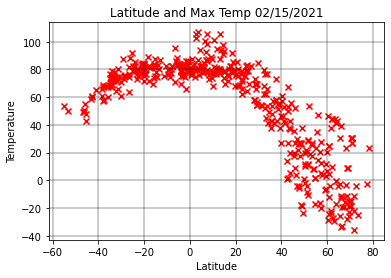

In [89]:
#Temperature v. Latitude
X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Max Temperature']
Time = time.strftime("%m/%d/%Y")

plt.scatter(city_pd['Latitude'], city_pd['Max Temperature'], marker = 'x', color = 'red')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Temperature')
plt.title(f'Latitude and Max Temp {Time}')
plt.show()
#Analysis: Higher latitudes are associated with lower temperatures, most likely because there are far fewer southern cities 
#in the far southern latitudes compared to the far geographic north 

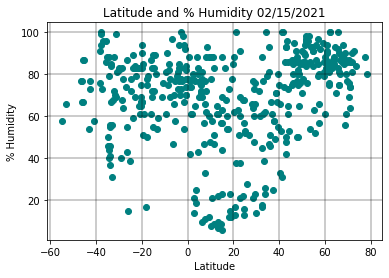

In [88]:
#Humidity (%) vs. Latitude

X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Humidity']
plt.scatter(city_pd['Latitude'], city_pd['Humidity'], marker = 'o', color = 'teal')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('% Humidity')
plt.title(f'Latitude and % Humidity {Time}')
plt.show()

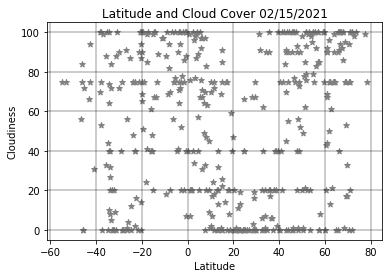

In [95]:
#Cloudiness (%) vs. Latitude

X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Cloudiness']
plt.scatter(X_axis_values, Y_axis_values, marker = '*', color = 'gray')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title(f'Latitude and Cloud Cover {Time}')
plt.show()
#zero observable relationship

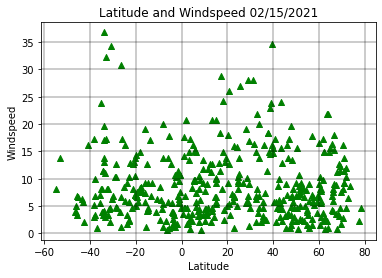

In [98]:
# Wind Speed (mph) vs. Latitude
X_axis_values = city_pd['Latitude']
Y_axis_values = city_pd['Windspeed']
plt.scatter(X_axis_values, Y_axis_values, marker = '^', color = 'green')
plt.grid(color='black', linestyle='-', linewidth=.4)
plt.xlabel("Latitude")
plt.ylabel('Windspeed')
plt.title(f'Latitude and Windspeed {Time}')
plt.show()
#weak relationship, but outlier windspeeds clustered around -40 to -20 and 20 to 40 lat

In [ ]:
#run linear regression on relationship
#Northern Hemisphere - Temperature (F) vs. Latitude

#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
